In [226]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(24, 12)})
plt.rcParams["figure.figsize"] = (20,10)

In [227]:
df = pd.read_csv("Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


Main columns:
    <p>- Member_number: unique cusomter</p>
    <p>- Date: purchase date</p>
    <p>- itemDescription: type of product</p>

In [228]:
df.info()
#Checking if it has any missing rows
print("----------------Missing values---------------")
df.isna().any()
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
----------------Missing values---------------


Member_number      False
Date               False
itemDescription    False
dtype: bool

Renaming the columns

In [229]:
df.columns = ['memberID', 'purchaseDate', 'item']
df.head()

,memberID,purchaseDate,item
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [230]:
df['purchaseDate'] = pd.to_datetime(df['purchaseDate'])
weekly_sales =  df.resample('W', on="purchaseDate").size()
weekly_sales= weekly_sales.to_frame().reset_index()

## NUMBER OF SALES PER WEEK

Text(0.5, 1.0, 'Sales per week')

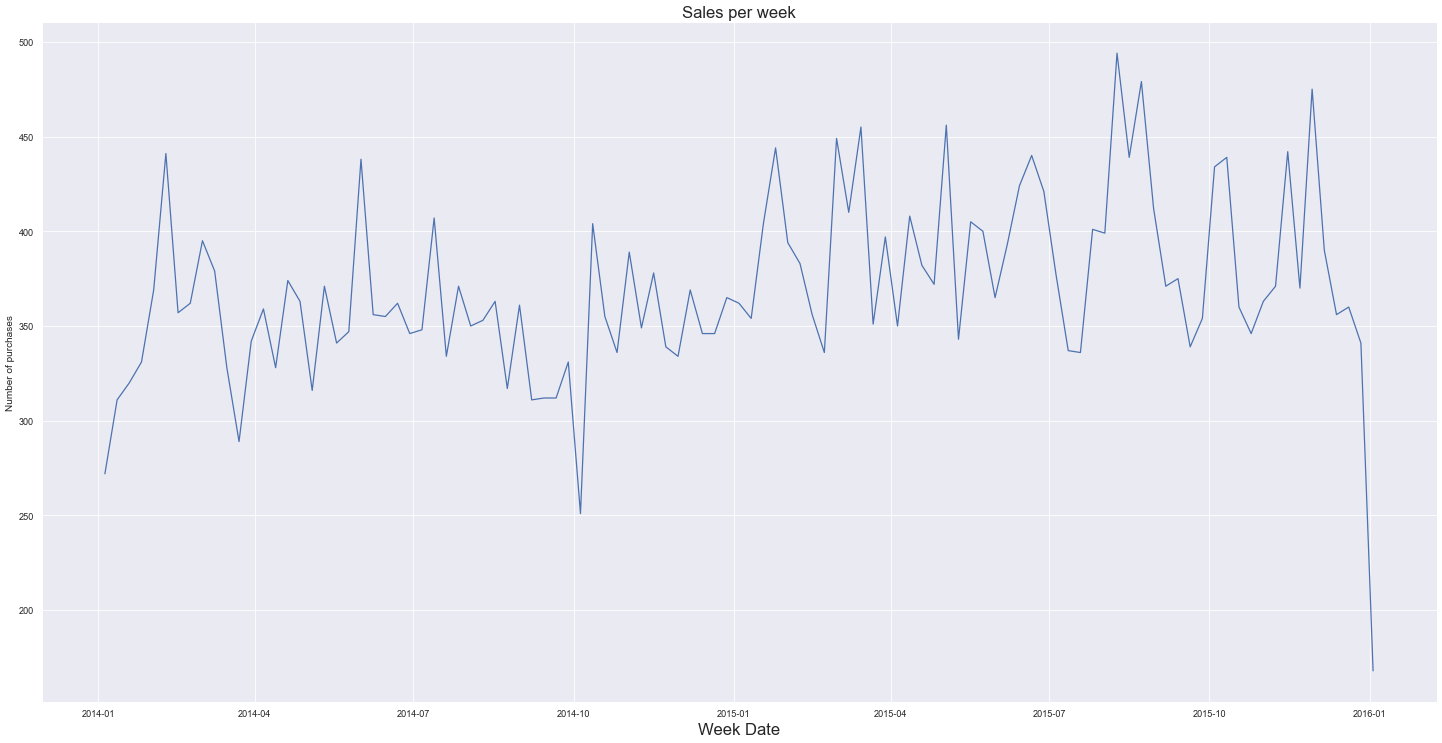

In [220]:
plt.figure(dpi=60)
sns.lineplot(x=weekly_sales['purchaseDate'],y=weekly_sales[0])
plt.xlabel("Week Date",fontdict={'fontsize':20})
plt.ylabel("Number of purchases")
plt.title("Sales per week",fontdict={'fontsize':20})

<Figure size 3000x1500 with 0 Axes>

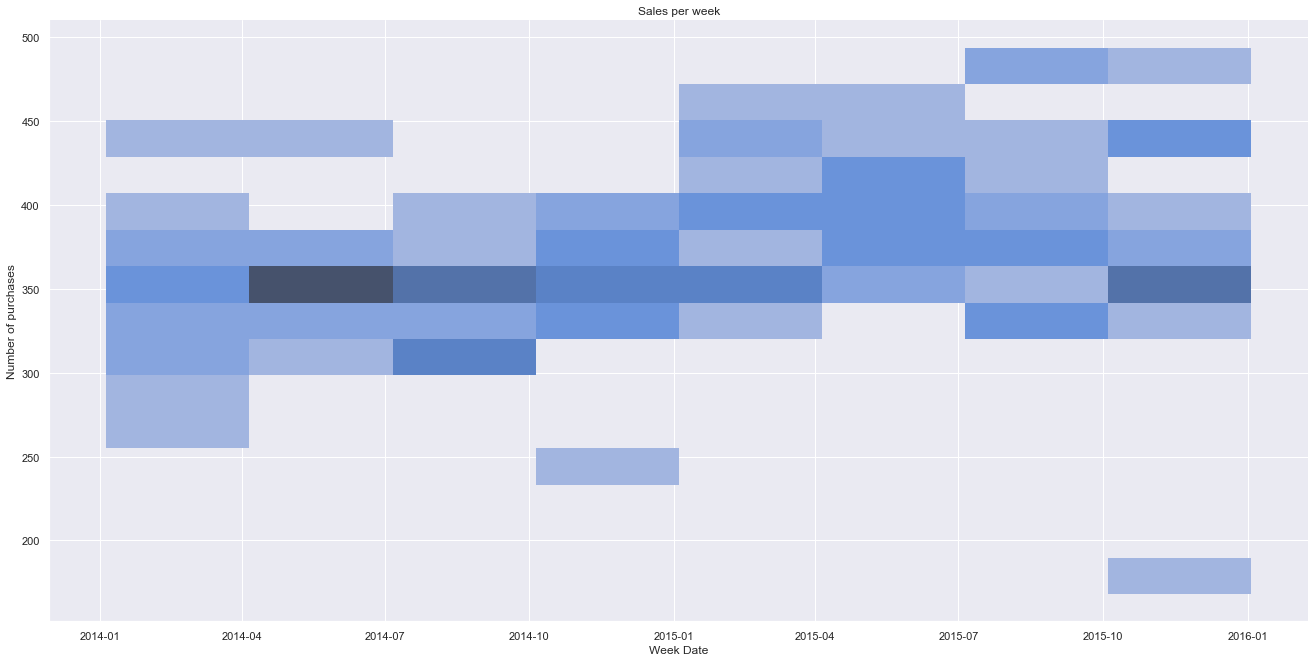

In [217]:
plt.figure(dpi=100)
sns.displot(x=weekly_sales['purchaseDate'],y=weekly_sales[0],aspect=1.5)
plt.xlabel("Week Date",fontdict={'fontsize':20})
plt.ylabel("Number of purchases")
plt.title("Sales per week",fontdict={'fontsize':20})
plt.gcf().set_size_inches(20, 10)

## NUMBER OF CUSTOMERS PER WEEK

In [237]:
weekly_customers = df.resample('W', on="purchaseDate").memberID.nunique()
weekly_customers= weekly_customers.to_frame().reset_index()
weekly_customers

,purchaseDate,memberID
0,2014-01-05,121
1,2014-01-12,132
2,2014-01-19,139
3,2014-01-26,146
4,2014-02-02,160
...,...,...
100,2015-12-06,123
101,2015-12-13,115
102,2015-12-20,129
103,2015-12-27,116


Text(0.5, 1.0, 'Customers per week')

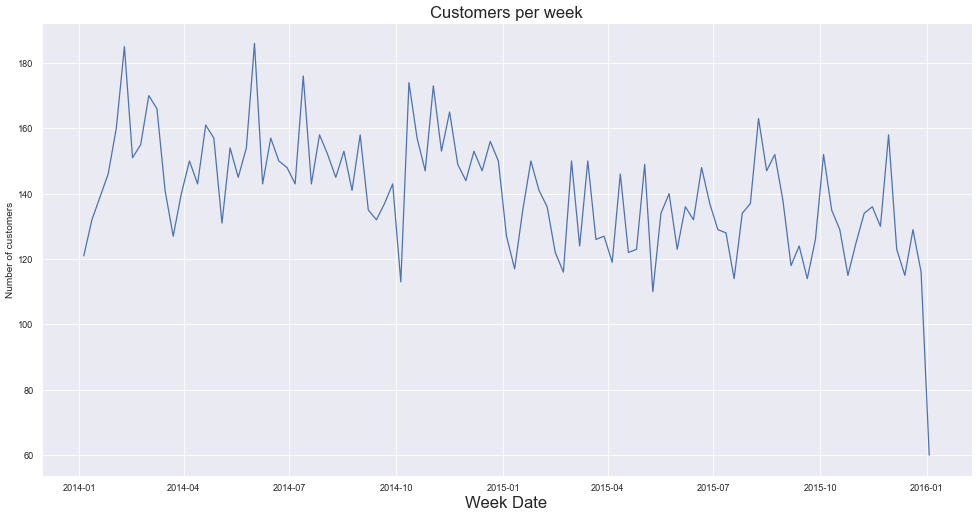

In [242]:
plt.figure(dpi=60)
sns.lineplot(x=weekly_customers['purchaseDate'],y=weekly_customers['memberID'])
plt.xlabel("Week Date",fontdict={'fontsize':20})
plt.ylabel("Number of customers")
plt.title("Customers per week",fontdict={'fontsize':20})

Text(0.5, 1.0, 'Customers per week')

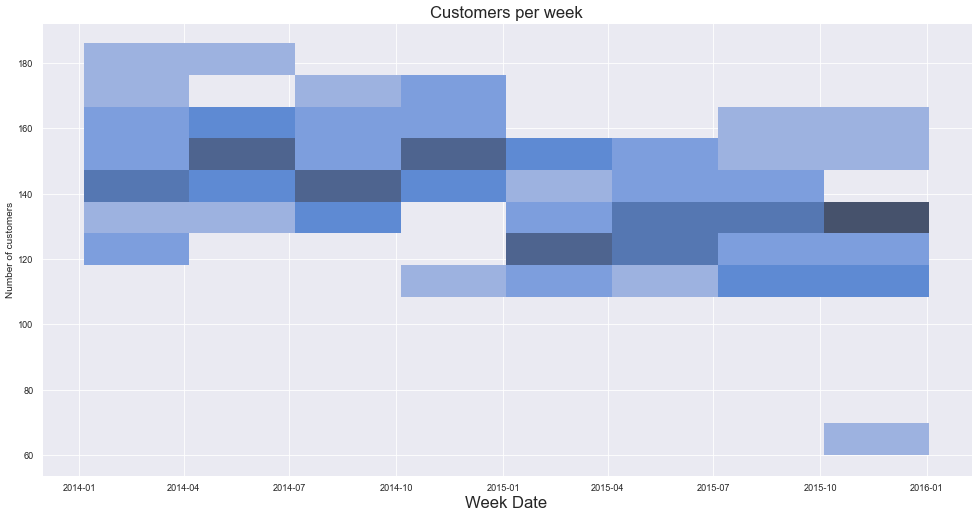

In [244]:
plt.figure(dpi=60)
sns.histplot(x=weekly_customers['purchaseDate'],y=weekly_customers['memberID'])
plt.xlabel("Week Date",fontdict={'fontsize':20})
plt.ylabel("Number of customers")
plt.title("Customers per week",fontdict={'fontsize':20})

## NUMBER OF SALES PER CUSTOMER PER WEEK

In [168]:
weekly_sales_2 = df.resample('W', on="purchaseDate").memberID.nunique()
weekly_sales_2 = weekly_sales_2.to_frame().reset_index()
weekly_sales_2['sales_per_customer'] = weekly_sales[0] / weekly_sales_2['memberID']

Text(0.5, 1.0, 'Sales per unique customer per week')

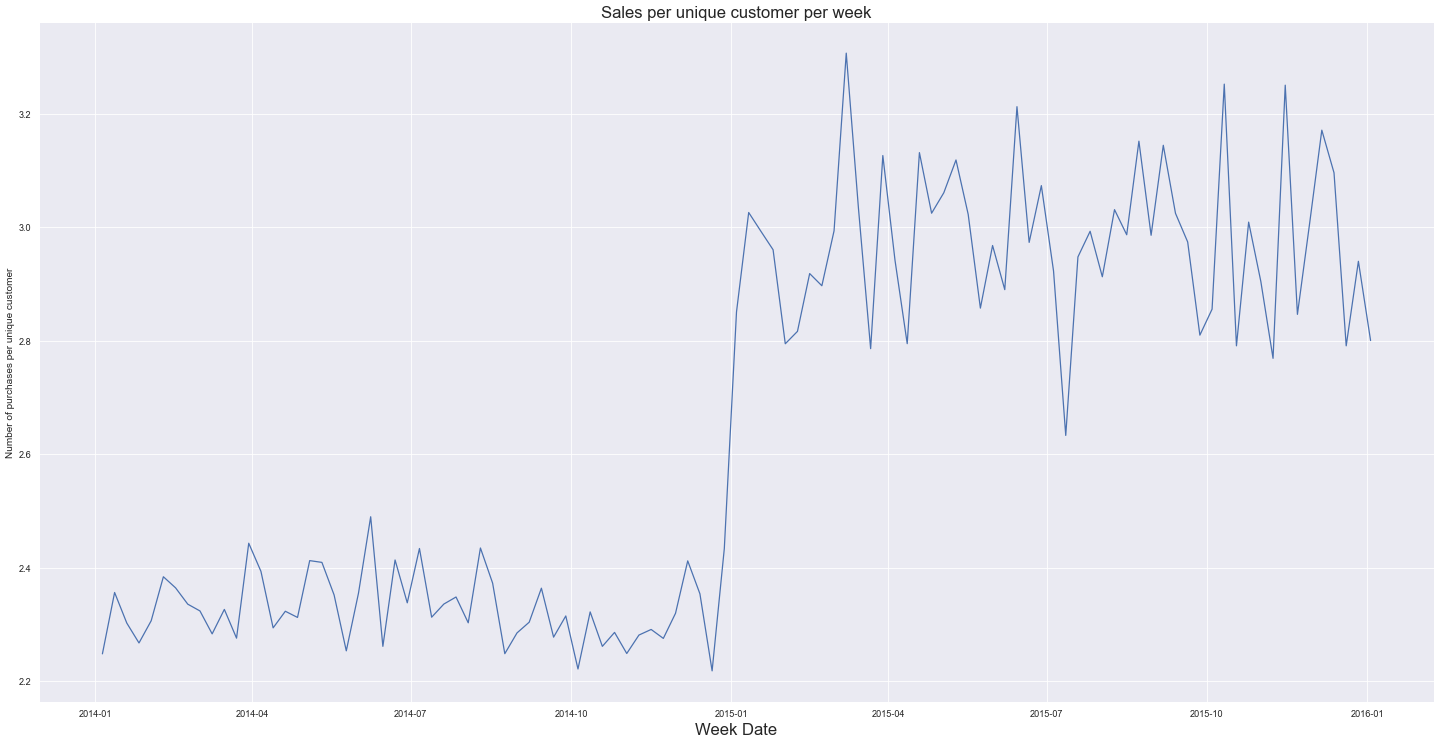

In [221]:
plt.figure(dpi=60)
sns.lineplot(x=weekly_sales_2['purchaseDate'],y=weekly_sales_2['sales_per_customer'])
plt.xlabel("Week Date",fontdict={'fontsize':20})
plt.ylabel("Number of purchases per unique customer")
plt.title("Sales per unique customer per week",fontdict={'fontsize':20})

## TOP SELLING ITEMS

In [212]:
itemcounts = df.groupby('item').count().reset_index()
itemcounts['count']= itemcounts['memberID']
itemcounts_sorted = itemcounts.sort_values(by=['count'], ascending=False)

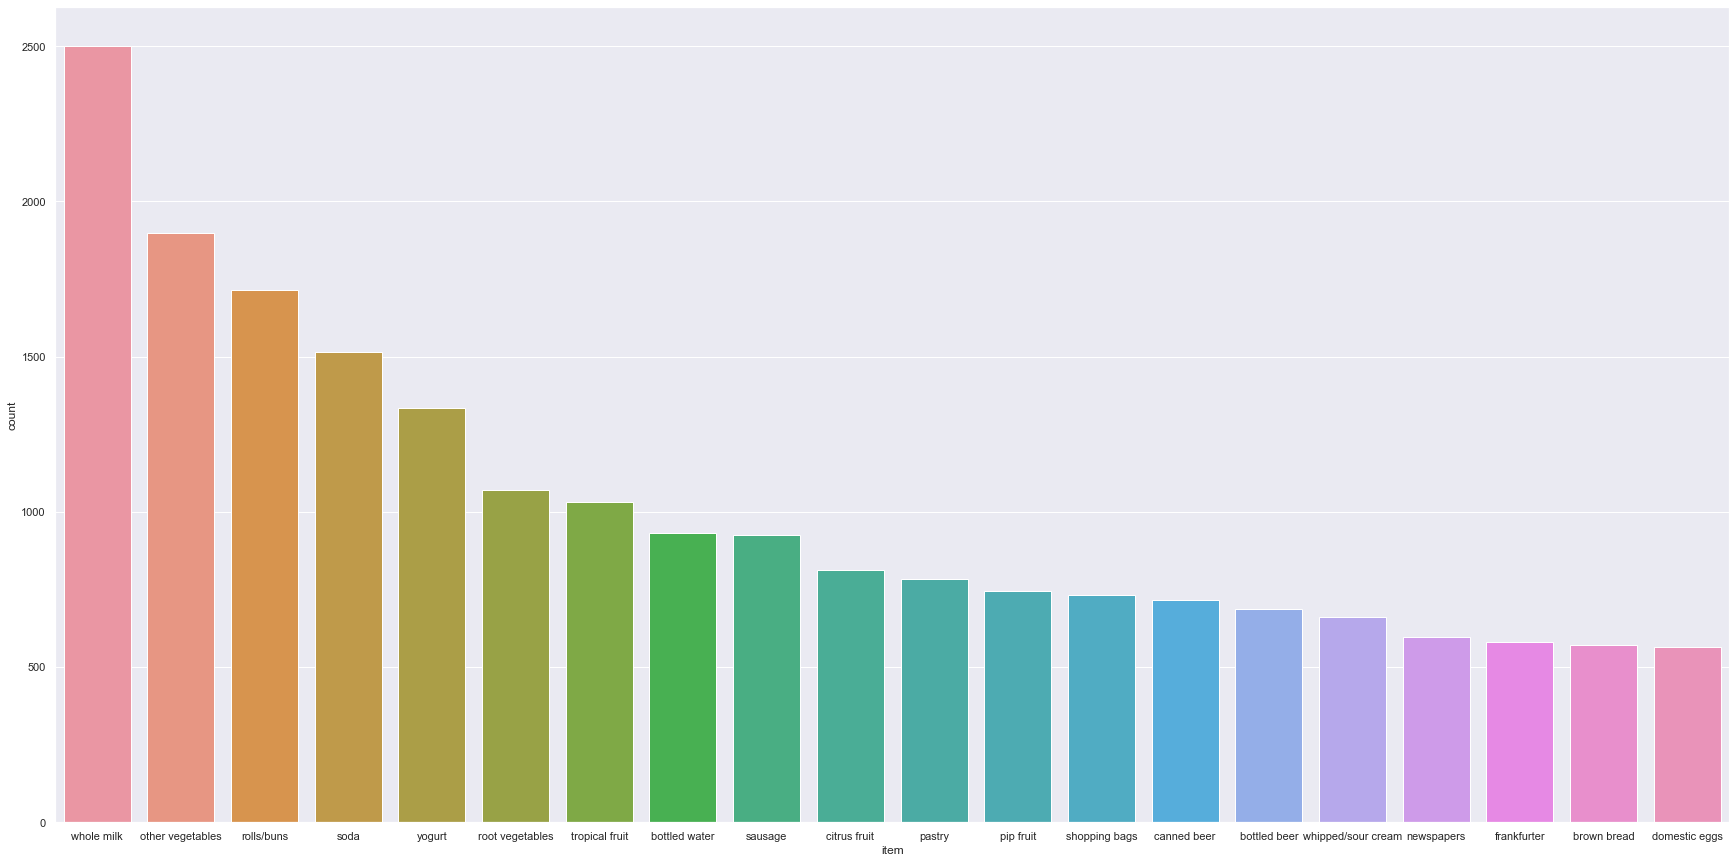

In [213]:

sns.barplot(x='item', y='count', data=itemcounts_sorted[0:20])
plt.gcf().set_size_inches(30, 15)